# Sentiment Analysis

Download the Foursquare annotated comments in Brazilian Portuguese: https://www.kaggle.com/thaisalmeida/tips-foursquare/version/1

Place the files in subfolder 'docs/'

If using colab, upload file `tips_scenario1_train.csv` using colab file upload.

In [1]:
useColab=False
if useColab:
    #!wget files if using Google Colab
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/preProcessing.py
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/Embeddings.py
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/textModels.py
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/requirements.txt
    !pip install keras --upgrade #need this - bug fix
    !pip install -r requirements.txt


    #move CSVs to docs/ folder
    from google.colab import files
    files.upload()

    !mkdir docs
    !mv *.csv docs/
    !ls

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import preProcessing

from sklearn.model_selection import RandomizedSearchCV
pd.set_option('max_colwidth',150)

In [3]:
df = pd.read_csv('docs/tips_scenario1_train.csv')
df.head(16)

,texto,rotulo
0,"A comida é deliciosa, mas pedi limonada suiça e me disseram que hoje estavam todos muito ocupados e que ninguém conseguiria me atender....melhor i...",-1.0
1,"A partir desta sexta feira dia 11 começam a abrir para jantar mas corre pois é só até as 22 hrs e no domingo dia das mães, estarão aberto durante ...",0.0
2,Joint burguer e brewdog,0.0
3,Agora de segunda a sexta o Habanero vai abrir no almoço com pratos mexicanos e tradicionais!,0.0
4,"Experimente o drink ""Dona Diabla"". Muito bom!",1.0
5,Nova senha do Wifi: 1129508219,0.0
6,Wi-fi 1129508219,0.0
7,"Adoramos a pizza carbonara e a paulistana. Não surpreendeu tanto, mas vale a pena por resgatar o tradicionalismo. Dica @Gourmet_For",1.0
8,"O diferencial desse Burger King é que você mesmo serve o refrigerante, e a vontade!",1.0
9,Unico defeito estacionamento pago!,-1.0


In [4]:
preProcessing.clean_text('Este é um teste de 354 números! Mas que: "interessante".')

'este é um teste de 000 números ! mas que : interessante .'

In [5]:
preProcessing.splitWithPunctuation('mas que: "legal"')

['mas', 'que', ':', '"', 'legal', '"']

In [6]:
df.shape

(1714, 2)

# Baseline: Bag of words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
df = df.fillna(0)

In [8]:
texts = df['texto'].astype(str).tolist()
categs = df['rotulo'].tolist()
texts = [preProcessing.clean_text(t) for t in texts]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(texts, categs, test_size=0.1, random_state=42)

In [10]:
countVec = CountVectorizer(max_features=4700, lowercase=False, strip_accents='unicode')
vectTexts_train = countVec.fit_transform(X_train)
vectTexts_test = countVec.transform(X_test)

In [11]:
countVec.vocabulary_

{'achei': 72,
 'comida': 960,
 'bem': 498,
 'mediocre': 2670,
 'prato': 3380,
 'com': 929,
 'muitas': 2845,
 'coisas': 915,
 'mas': 2647,
 'nada': 2878,
 'sabor': 3782,
 'nao': 2885,
 'vale': 4367,
 'que': 3523,
 'custa': 1173,
 'picburguer': 3272,
 'americano': 220,
 'sempre': 3883,
 'muito': 2847,
 'caro': 720,
 'pelo': 3191,
 'tamanho': 4121,
 'fomos': 1889,
 'em': 1476,
 'dois': 1416,
 'gastamos': 2006,
 '00': 0,
 'para': 3105,
 'fast': 1781,
 'food': 1891,
 'de': 1190,
 'normal': 2941,
 'foi': 1879,
 'ojo': 2993,
 'del': 1231,
 'bifefantastico': 515,
 'torta': 4263,
 'bacalhau': 406,
 'maravilhosa': 2628,
 'saladona': 3811,
 'opcao': 3017,
 'por': 3340,
 'reais': 3588,
 'no': 2930,
 'almoco': 190,
 'servico': 3927,
 'gentil': 2030,
 'unico': 4352,
 'problema': 3446,
 'demora': 1253,
 'desnecessario': 1302,
 'colocar': 926,
 'todos': 4235,
 'os': 3039,
 'funcionarios': 1974,
 'trabalhar': 4276,
 'dia': 1336,
 'deveriam': 1329,
 'ter': 4176,
 'dado': 1176,
 'folga': 1881,
 'pois': 3

In [12]:
np.argmax(countVec.transform(['experimente', 'achei', 'caro']), axis=1)

matrix([[1723],
        [  72],
        [ 720]])

In [13]:
vectTexts_train

<1542x4551 sparse matrix of type '<class 'numpy.int64'>'
	with 25320 stored elements in Compressed Sparse Row format>

In [14]:
mnb = MultinomialNB()
mnb.fit(vectTexts_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
mnb.score(vectTexts_train, y_train)

0.9111543450064851

In [16]:
mnb.score(vectTexts_test, y_test)

0.7790697674418605

In [17]:
mnbParams = { #'verbose' : [1],
             'alpha':[0.001, 0.1,1,10, 100],  
             'fit_prior' :[True, False]}
mnbRSCV = RandomizedSearchCV(mnb, mnbParams, verbose=1, return_train_score=True) #, n_jobs=-1)
mnbRSCV.fit(vectTexts_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\dougl\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'alpha': [0.001, 0.1, 1, 10, 100], 'fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [18]:
pd.DataFrame(mnbRSCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_prior,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005207,0.007364,0.0,0.0,True,0.001,"{'fit_prior': True, 'alpha': 0.001}",0.753398,0.776699,0.757812,0.762646,0.010113,3,0.988315,0.986368,0.990291,0.988325,0.001602
1,0.000000,0.000000,0.0,0.0,False,0.001,"{'fit_prior': False, 'alpha': 0.001}",0.745631,0.761165,0.757812,0.754864,0.006680,4,0.988315,0.984421,0.988350,0.987029,0.001844
2,0.000000,0.000000,0.0,0.0,True,0.1,"{'fit_prior': True, 'alpha': 0.1}",0.745631,0.763107,0.703125,0.737354,0.025167,5,0.979552,0.980526,0.986408,0.982162,0.003028
3,0.000000,0.000000,0.0,0.0,False,0.1,"{'fit_prior': False, 'alpha': 0.1}",0.702913,0.714563,0.664062,0.693904,0.021572,7,0.981500,0.976631,0.980583,0.979571,0.002112
4,0.005207,0.007364,0.0,0.0,True,1,"{'fit_prior': True, 'alpha': 1}",0.800000,0.800000,0.791016,0.797017,0.004231,1,0.914314,0.906524,0.909709,0.910182,0.003198
5,0.000000,0.000000,0.0,0.0,False,1,"{'fit_prior': False, 'alpha': 1}",0.782524,0.800000,0.771484,0.784695,0.011737,2,0.929893,0.927945,0.930097,0.929312,0.000970
6,0.000000,0.000000,0.0,0.0,True,10,"{'fit_prior': True, 'alpha': 10}",0.689320,0.687379,0.693359,0.690013,0.002489,8,0.704966,0.697176,0.692233,0.698125,0.005241
7,0.005207,0.007364,0.0,0.0,False,10,"{'fit_prior': False, 'alpha': 10}",0.702913,0.706796,0.714844,0.708171,0.004965,6,0.740019,0.724440,0.722330,0.728930,0.007889
8,0.000000,0.000000,0.0,0.0,True,100,"{'fit_prior': True, 'alpha': 100}",0.681553,0.681553,0.683594,0.682231,0.000961,10,0.682571,0.682571,0.681553,0.682232,0.000480
9,0.005207,0.007364,0.0,0.0,False,100,"{'fit_prior': False, 'alpha': 100}",0.685437,0.685437,0.689453,0.686770,0.001891,9,0.697176,0.688413,0.689320,0.691636,0.003935


In [19]:
mnbRSCV.best_estimator_.score(vectTexts_test, y_test)

0.7790697674418605

# Word Embedding Class

In [20]:
from Embeddings import WordEmbeddingBR, splitWithPunctuation
import numpy as np

In [21]:
WordEmbeddingBR.downloadNILCEmbeddings()
WordEmbeddingBR.getAvailableEmbeddings()

glove50 exists. Skipping.
cbow50_wang2vec exists. Skipping.
cbow50_fasttext exists. Skipping.
skip50_word2vec exists. Skipping.
Done!


['cbow50_fasttext', 'cbow50_wang2vec', 'glove50', 'skip50_word2vec']

In [22]:
#wee = WordEmbeddingBR('skip_s300_word2vec')
wee = WordEmbeddingBR('cbow50_wang2vec')

Reading embedding file: cbow50_wang2vec.zip


In [26]:
classifiers = wee.TrainBaselineClassifiers(X_train, y_train, n_iter=5)

Fitting Support Vector Machine...


C:\Users\dougl\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.1s finished


[LibSVM]Fitting Gradient Boosted Tree...


C:\Users\dougl\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1         728.7237            1.75m
         2         643.7690           52.29s
         3         595.6006           37.47s
         4         558.0391           30.05s
         5         523.7959           23.99s
         6         495.2028           21.29s
         7         469.4923           18.21s
         8         443.6192           16.89s
         9         425.1666           14.99s
        10         409.1998           14.26s
        20         270.1485            8.54s
        30         181.9425            6.85s
        40         126.9405            5.85s
        50          91.9661            5.17s
        60          69.8505            4.69s
        70          54.2246            4.43s
        80          40.9266            4.13s
        90          31.3832            3.89s
       100          24.4933            3.74s
       200           2.4540            2.44s
       300           0.2983            1.54s
       40

         9         111.8681           10.00s
        10          90.1634           10.02s
        20          12.7253            9.04s
        30           3.9315            7.72s
        40           3.1370            6.10s
        50           3.0457            4.69s
        60           2.9685            3.73s
        70           2.9184            3.01s
        80           2.8801            2.43s
        90           2.8517            1.96s
       100           2.8322            1.53s
      Iter       Train Loss   Remaining Time 
         1         489.2880           17.20s
         2         285.5367           21.54s
         3         165.8169           20.09s
         4         103.6100           21.50s
         5          66.7889           21.17s
         6          46.9082           21.90s
         7          31.1235           22.76s
         8          22.1893           23.02s
         9          16.3737           21.99s
        10          12.3329           22.51s
        2

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   59.8s finished


      Iter       Train Loss   Remaining Time 
         1        1077.9664           16.19s
         2         879.2111           16.14s
         3         748.4646           16.12s
         4         634.0699           16.09s
         5         559.4078           16.06s
         6         501.3423           16.03s
         7         439.6083           16.00s
         8         388.9342           15.96s
         9         342.6164           15.93s
        10         300.5856           15.90s
        20         131.8650           15.43s
        30          63.8562           14.73s
        40          35.6967           14.54s
        50          21.3201           14.20s
        60          13.1726           13.91s
        70           9.5701           13.30s
        80           7.3152           12.76s
        90           6.0746           12.32s
       100           5.2888           11.90s
       200           4.3109            7.30s
       300           4.2023            4.46s
       40

In [27]:
wee.TestBaselineClassifiers(X_train, y_train, classifiers)

{'SVM': 0.9954604409857328, 'GradientBoostingClassifier': 0.9980544747081712}

In [28]:
wee.TestBaselineClassifiers(X_test, y_test, classifiers)

{'SVM': 0.7674418604651163, 'GradientBoostingClassifier': 0.7325581395348837}

# RNN

Base: Bidirectional Attention Flow for Machine Comprehension https://arxiv.org/abs/1611.01603

TODO: Write data generator, model compatible with scikit-learn RandomSearchCV

Inputs to the model:

- Integer codes of each word
- Integer codes of each character of each word
- Pretrained embeddings for each word

## Step 1: Encode characters

For the character embedding layer, we will use all available characters plus the [PAD] character.

In [45]:
import textModels

In [46]:
#bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=4, wordEmbSize=4, preTrainedEmbeddings=wee, nHeads=1)
#bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=8, wordEmbSize=64, preTrainedEmbeddings=None, nHeads=1)
bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=16, wordEmbSize=64, preTrainedEmbeddings=wee, nHeads=4)
#bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=16, wordEmbSize=64, preTrainedEmbeddings=None, nHeads=1)

In [47]:
bdam.fit(X_train,y_train)

Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 1310 samples, validate on 232 samples
Epoch 1/100
Changing learning rate to 0.001
1310/1310 [==============================] - 11s 8ms/step - loss: 1.0317 - sparse_categorical_accuracy: 0.6481 - val_loss: 0.9845 - val_sparse_categorical_accuracy: 0.6466

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.64655, saving model to model-text.h5
Epoch 2/100
Changing learning rate to 0.001
1310/1310 [==============================] - 5s 3ms/step - loss: 0.9115 - sparse_categorical_accuracy: 0.6885 - val_loss: 0.8962 - val_sparse_categorical_accuracy: 0.6466

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.64655
Epoch 3/100
Changing learning rate to 0.001
1310/1310 [==============================] - 5s 3ms/step - loss: 0.8191 - sparse_categorical_accuracy: 0.6885 - val_loss: 0.8508 - val_sparse_categorical_accuracy: 0.6466

Epoch 00003: val_sparse_categorical_accuracy did not impr

1310/1310 [==============================] - 5s 3ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0.9763 - val_loss: 1.7415 - val_sparse_categorical_accuracy: 0.6422

Epoch 00028: val_sparse_categorical_accuracy did not improve from 0.75000
Epoch 29/100
Changing learning rate to 0.0006
1310/1310 [==============================] - 4s 3ms/step - loss: 0.0821 - sparse_categorical_accuracy: 0.9763 - val_loss: 1.8385 - val_sparse_categorical_accuracy: 0.6422

Epoch 00029: val_sparse_categorical_accuracy did not improve from 0.75000
Epoch 30/100
Changing learning rate to 0.0006
1310/1310 [==============================] - 5s 4ms/step - loss: 0.0796 - sparse_categorical_accuracy: 0.9779 - val_loss: 1.9816 - val_sparse_categorical_accuracy: 0.6509

Epoch 00030: val_sparse_categorical_accuracy did not improve from 0.75000
Epoch 31/100
Changing learning rate to 0.0006
1310/1310 [==============================] - 5s 4ms/step - loss: 0.0835 - sparse_categorical_accuracy: 0.9756 - val_loss: 1.

1310/1310 [==============================] - 5s 4ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9985 - val_loss: 2.9006 - val_sparse_categorical_accuracy: 0.6379

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.75000
Epoch 00055: early stopping


BiDirAttModelClassifier(charDictSize=101, charEmbSize=16, charfilterSize=4,
            dictSize=4741, epochs=100, modelFileName='model-text.h5',
            nClasses=3, nFiltersNGram=8, nFiltersWordGram=8, nHeads=4,
            patience=40,
            preTrainedEmbeddings=<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,
            val_split=0.15, wordEmbSize=64, wordfilterSize=4)

In [48]:
np.sum(bdam.predict(X_test)==np.array(y_test))/len(X_test)

Maximum sentence length: 47. Maximum number of chars in a word: 16


0.7790697674418605

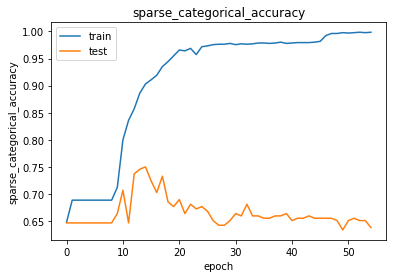

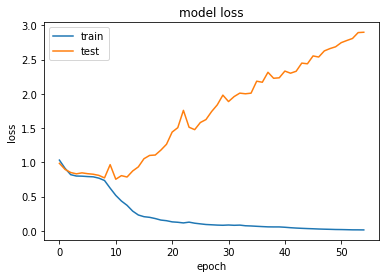

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
results = bdam.results_
# summarize history for intersestion over union
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('sparse_categorical_accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
y_test_pred, attw = bdam.predictWithAttention(X_test)
np.sum(y_test_pred==np.array(y_test))/len(X_test)

Maximum sentence length: 47. Maximum number of chars in a word: 16


0.7790697674418605

In [51]:
idpred=17

expectativa : french burguer vir com lâminas de trufas e foie gras . realidade : tudo vem misturado na carne do hamburguer :/ recomendação : peça o incrível piggie burguer com ementhal . sem erro !
pred:1.0, true:0.0


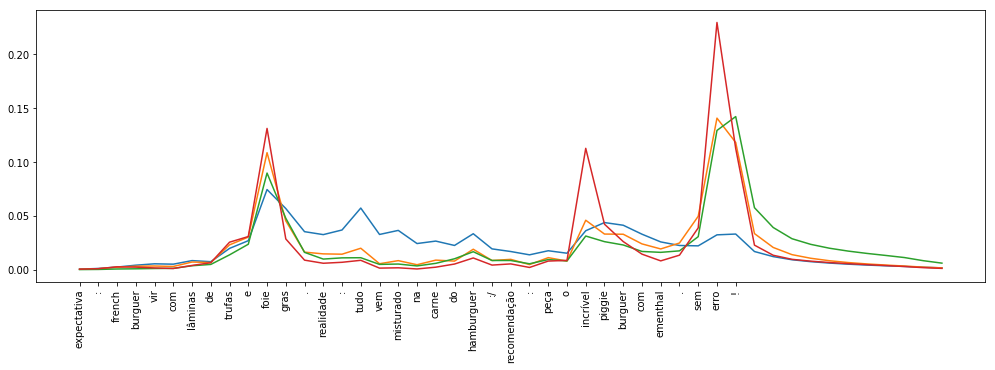

In [62]:
idpred+=1
print(X_test[idpred])
print('pred:{}, true:{}'.format(y_test_pred[idpred], y_test[idpred]))

words = X_test[idpred].split(' ')
ticks = [i for i in range(len(words))]

plt.figure(figsize=(17,5))
plt.xticks(ticks, words, rotation='vertical')
for k in range(attw.shape[1]):
    plt.plot(attw[idpred,k])

# Randomized Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rnnArgs = { 
            'nClasses' : [3],
            'preTrainedEmbeddings' : [wee],
            'dictSize' : [500, 1000, 2000, 4000],
            'nHeads' : [1,2,4],
            'charEmbSize' : [4, 8, 16, 32],
            'wordEmbSize' : [8, 16, 32, 64, 128],
            'nFiltersNGram' : [4, 8, 16],
            'nFiltersWordGram' : [4, 8, 16],
            'charfilterSize' : [4,  8, 16],
            'wordfilterSize' : [4, 8, 16],
          }    

rsRNN = RandomizedSearchCV(bdam, rnnArgs, verbose = 1, n_iter=10, return_train_score=True)

In [65]:
rsRNN.fit(X_train, y_train)

C:\Users\dougl\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Maximum sentence length: 48. Maximum number of chars in a word: 46
Train on 872 samples, validate on 155 samples
Epoch 1/100
Changing learning rate to 0.001
872/872 [==============================] - 10s 12ms/step - loss: 1.0503 - sparse_categorical_accuracy: 0.6800 - val_loss: 0.9317 - val_sparse_categorical_accuracy: 0.6452

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.64516, saving model to model-text.h5
Epoch 2/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.8667 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8515 - val_sparse_categorical_accuracy: 0.6452

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 3/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.8031 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8357 - val_sparse_categorical_accuracy: 0.6452

Epoch 00003: val_sparse_categorical_accuracy did not improve fr

872/872 [==============================] - 3s 3ms/step - loss: 0.0032 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0431 - val_sparse_categorical_accuracy: 0.7226

Epoch 00028: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 29/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.0025 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.8952 - val_sparse_categorical_accuracy: 0.7161

Epoch 00029: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 30/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.0035 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.0226 - val_sparse_categorical_accuracy: 0.7355

Epoch 00030: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 31/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.0027 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.9860 - v

872/872 [==============================] - 3s 3ms/step - loss: 1.4067e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.2972 - val_sparse_categorical_accuracy: 0.7419

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 56/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 1.4106e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.3106 - val_sparse_categorical_accuracy: 0.7419

Epoch 00056: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 00056: early stopping
Maximum sentence length: 49. Maximum number of chars in a word: 35
Maximum sentence length: 48. Maximum number of chars in a word: 46
Maximum sentence length: 49. Maximum number of chars in a word: 37
Train on 872 samples, validate on 155 samples
Epoch 1/100
Changing learning rate to 0.001
872/872 [==============================] - 12s 13ms/step - loss: 1.0439 - sparse_categorical_accuracy: 0.5677 - val_loss: 0


Epoch 00025: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 26/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.0199 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.5647 - val_sparse_categorical_accuracy: 0.7419

Epoch 00026: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 27/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.0207 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.5959 - val_sparse_categorical_accuracy: 0.7032

Epoch 00027: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 28/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.0193 - sparse_categorical_accuracy: 0.9920 - val_loss: 1.6687 - val_sparse_categorical_accuracy: 0.7226

Epoch 00028: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 29/100
Changing learning rate to 0.0006
872/872 [

872/872 [==============================] - 2s 3ms/step - loss: 0.0056 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.0900 - val_sparse_categorical_accuracy: 0.7290

Epoch 00053: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 54/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 2s 3ms/step - loss: 0.0050 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.0033 - val_sparse_categorical_accuracy: 0.7161

Epoch 00054: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 55/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 2s 3ms/step - loss: 0.0049 - sparse_categorical_accuracy: 0.9966 - val_loss: 2.0366 - val_sparse_categorical_accuracy: 0.7161

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 56/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 2s 3ms/step - loss: 0.0056 - sparse_cat

875/875 [==============================] - 3s 3ms/step - loss: 0.0230 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.7934 - val_sparse_categorical_accuracy: 0.7742

Epoch 00015: val_sparse_categorical_accuracy did not improve from 0.80645
Epoch 16/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.0196 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.5839 - val_sparse_categorical_accuracy: 0.7613

Epoch 00016: val_sparse_categorical_accuracy did not improve from 0.80645
Epoch 17/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.0144 - sparse_categorical_accuracy: 0.9954 - val_loss: 1.5255 - val_sparse_categorical_accuracy: 0.7484

Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.80645
Epoch 18/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.0119 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.7145 - val_

875/875 [==============================] - 3s 3ms/step - loss: 0.0024 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.0183 - val_sparse_categorical_accuracy: 0.7290

Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.80645
Epoch 44/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.0026 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.0243 - val_sparse_categorical_accuracy: 0.7290

Epoch 00044: val_sparse_categorical_accuracy did not improve from 0.80645
Epoch 45/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.0023 - sparse_categorical_accuracy: 0.9977 - val_loss: 2.0124 - val_sparse_categorical_accuracy: 0.7419

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.80645
Epoch 46/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.0024 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.8038 - sparse_categorical_accuracy: 0.8326 - val_loss: 1.0098 - val_sparse_categorical_accuracy: 0.6516

Epoch 00023: val_sparse_categorical_accuracy did not improve from 0.65161
Epoch 24/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.7892 - sparse_categorical_accuracy: 0.7878 - val_loss: 1.0122 - val_sparse_categorical_accuracy: 0.6903

Epoch 00024: val_sparse_categorical_accuracy improved from 0.65161 to 0.69032, saving model to model-text.h5
Epoch 25/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.7757 - sparse_categorical_accuracy: 0.8463 - val_loss: 1.0263 - val_sparse_categorical_accuracy: 0.6839

Epoch 00025: val_sparse_categorical_accuracy did not improve from 0.69032
Epoch 26/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.7599 - sparse_categorical_accu

872/872 [==============================] - 3s 4ms/step - loss: 0.2774 - sparse_categorical_accuracy: 0.9083 - val_loss: 1.1742 - val_sparse_categorical_accuracy: 0.7097

Epoch 00050: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 51/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.2734 - sparse_categorical_accuracy: 0.9083 - val_loss: 1.2030 - val_sparse_categorical_accuracy: 0.7161

Epoch 00051: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 52/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.2693 - sparse_categorical_accuracy: 0.9106 - val_loss: 1.1846 - val_sparse_categorical_accuracy: 0.7032

Epoch 00052: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 53/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.2671 - sparse_cat


Epoch 00076: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 77/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1993 - sparse_categorical_accuracy: 0.9140 - val_loss: 1.3163 - val_sparse_categorical_accuracy: 0.7226

Epoch 00077: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 78/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1966 - sparse_categorical_accuracy: 0.9163 - val_loss: 1.3306 - val_sparse_categorical_accuracy: 0.7226

Epoch 00078: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 79/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1949 - sparse_categorical_accuracy: 0.9140 - val_loss: 1.3485 - val_sparse_categorical_accuracy: 0.7226

Epoch 00079: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 8

872/872 [==============================] - 3s 3ms/step - loss: 1.0873 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0862 - val_sparse_categorical_accuracy: 0.6452

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 4/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 1.0825 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0820 - val_sparse_categorical_accuracy: 0.6452

Epoch 00004: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 5/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 1.0777 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0779 - val_sparse_categorical_accuracy: 0.6452

Epoch 00005: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 6/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 1.0731 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0738 - val_spa

872/872 [==============================] - 3s 4ms/step - loss: 0.9908 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0042 - val_sparse_categorical_accuracy: 0.6452

Epoch 00031: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 32/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.9887 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0024 - val_sparse_categorical_accuracy: 0.6452

Epoch 00032: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 33/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.9866 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0007 - val_sparse_categorical_accuracy: 0.6452

Epoch 00033: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 34/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.9846 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9990 - v

875/875 [==============================] - 3s 3ms/step - loss: 0.6204 - sparse_categorical_accuracy: 0.7154 - val_loss: 0.7463 - val_sparse_categorical_accuracy: 0.7935

Epoch 00016: val_sparse_categorical_accuracy improved from 0.66452 to 0.79355, saving model to model-text.h5
Epoch 17/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.5872 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.7265 - val_sparse_categorical_accuracy: 0.7871

Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.79355
Epoch 18/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.5887 - sparse_categorical_accuracy: 0.8194 - val_loss: 0.8833 - val_sparse_categorical_accuracy: 0.7742

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.79355
Epoch 19/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.5635 - sparse_categorical_accurac

875/875 [==============================] - 3s 4ms/step - loss: 0.4047 - sparse_categorical_accuracy: 0.8846 - val_loss: 1.0540 - val_sparse_categorical_accuracy: 0.7742

Epoch 00044: val_sparse_categorical_accuracy did not improve from 0.81290
Epoch 45/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 4ms/step - loss: 0.4029 - sparse_categorical_accuracy: 0.8834 - val_loss: 1.0449 - val_sparse_categorical_accuracy: 0.7677

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.81290
Epoch 46/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.4012 - sparse_categorical_accuracy: 0.8846 - val_loss: 1.0806 - val_sparse_categorical_accuracy: 0.7742

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.81290
Epoch 47/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.4005 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.9257 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9853 - val_sparse_categorical_accuracy: 0.6452

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 9/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.9184 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9749 - val_sparse_categorical_accuracy: 0.6452

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 10/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.9091 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9660 - val_sparse_categorical_accuracy: 0.6452

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 11/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.8974 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9511 - val_s


Epoch 00035: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 36/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.2369 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.9040 - val_sparse_categorical_accuracy: 0.7290

Epoch 00036: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 37/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.2287 - sparse_categorical_accuracy: 0.9323 - val_loss: 0.8675 - val_sparse_categorical_accuracy: 0.7161

Epoch 00037: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 38/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.2220 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.9180 - val_sparse_categorical_accuracy: 0.7484

Epoch 00038: val_sparse_categorical_accuracy improved from 0.73548 to 0.74839, saving model to model-text.h5
Epoch 39/100
Changin


Epoch 00062: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 63/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1512 - sparse_categorical_accuracy: 0.9518 - val_loss: 0.9938 - val_sparse_categorical_accuracy: 0.7484

Epoch 00063: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 64/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1475 - sparse_categorical_accuracy: 0.9415 - val_loss: 1.0591 - val_sparse_categorical_accuracy: 0.7226

Epoch 00064: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 65/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1454 - sparse_categorical_accuracy: 0.9599 - val_loss: 1.0202 - val_sparse_categorical_accuracy: 0.7548

Epoch 00065: val_sparse_categorical_accuracy improved from 0.74839 to 0.75484, sa


Epoch 00089: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 90/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.1102 - sparse_categorical_accuracy: 0.9839 - val_loss: 1.1303 - val_sparse_categorical_accuracy: 0.7226

Epoch 00090: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 91/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.1103 - sparse_categorical_accuracy: 0.9839 - val_loss: 1.0991 - val_sparse_categorical_accuracy: 0.7290

Epoch 00091: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 92/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9851 - val_loss: 1.1260 - val_sparse_categorical_accuracy: 0.7226

Epoch 00092: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 93/100
Changing learning rate to 0.00012

872/872 [==============================] - 3s 3ms/step - loss: 0.6854 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9503 - val_sparse_categorical_accuracy: 0.6194

Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.65806
Epoch 18/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.6339 - sparse_categorical_accuracy: 0.6904 - val_loss: 0.9042 - val_sparse_categorical_accuracy: 0.6129

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.65806
Epoch 19/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.5934 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8442 - val_sparse_categorical_accuracy: 0.6323

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.65806
Epoch 20/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.5531 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8635 - val

872/872 [==============================] - 3s 3ms/step - loss: 0.2945 - sparse_categorical_accuracy: 0.9748 - val_loss: 1.2323 - val_sparse_categorical_accuracy: 0.6452

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 46/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.9782 - val_loss: 1.2097 - val_sparse_categorical_accuracy: 0.6258

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 47/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.2859 - sparse_categorical_accuracy: 0.9782 - val_loss: 1.2180 - val_sparse_categorical_accuracy: 0.6258

Epoch 00047: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 48/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.2822 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.2413 - sparse_categorical_accuracy: 0.9920 - val_loss: 1.5301 - val_sparse_categorical_accuracy: 0.6258

Epoch 00072: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 73/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 3ms/step - loss: 0.2405 - sparse_categorical_accuracy: 0.9920 - val_loss: 1.5216 - val_sparse_categorical_accuracy: 0.6323

Epoch 00073: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 00073: early stopping
Maximum sentence length: 48. Maximum number of chars in a word: 46
Maximum sentence length: 49. Maximum number of chars in a word: 37
Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 875 samples, validate on 155 samples
Epoch 1/100
Changing learning rate to 0.001
875/875 [==============================] - 17s 20ms/step - loss: 1.0969 - sparse_categorical_accuracy: 0.5863 - val_loss: 1.0932 - 


Epoch 00025: val_sparse_categorical_accuracy did not improve from 0.79355
Epoch 26/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 4ms/step - loss: 0.4015 - sparse_categorical_accuracy: 0.8743 - val_loss: 0.5679 - val_sparse_categorical_accuracy: 0.8000

Epoch 00026: val_sparse_categorical_accuracy improved from 0.79355 to 0.80000, saving model to model-text.h5
Epoch 27/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 3ms/step - loss: 0.3949 - sparse_categorical_accuracy: 0.8777 - val_loss: 0.5758 - val_sparse_categorical_accuracy: 0.8000

Epoch 00027: val_sparse_categorical_accuracy did not improve from 0.80000
Epoch 28/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 3ms/step - loss: 0.3807 - sparse_categorical_accuracy: 0.8789 - val_loss: 0.5847 - val_sparse_categorical_accuracy: 0.8065

Epoch 00028: val_sparse_categorical_accuracy improved from 0.80000 to 0.80645, saving model to


Epoch 00052: val_sparse_categorical_accuracy did not improve from 0.83226
Epoch 53/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.2314 - sparse_categorical_accuracy: 0.9097 - val_loss: 0.6893 - val_sparse_categorical_accuracy: 0.8194

Epoch 00053: val_sparse_categorical_accuracy did not improve from 0.83226
Epoch 54/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.2292 - sparse_categorical_accuracy: 0.9120 - val_loss: 0.7662 - val_sparse_categorical_accuracy: 0.7935

Epoch 00054: val_sparse_categorical_accuracy did not improve from 0.83226
Epoch 55/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.2255 - sparse_categorical_accuracy: 0.9166 - val_loss: 0.7464 - val_sparse_categorical_accuracy: 0.8000

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.83226
Epoch 5


Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 3/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 1.0376 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0501 - val_sparse_categorical_accuracy: 0.6452

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 4/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 1.0144 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0630 - val_sparse_categorical_accuracy: 0.6452

Epoch 00004: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 5/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 1.0067 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0448 - val_sparse_categorical_accuracy: 0.6452

Epoch 00005: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 6/100
Changing learning rate to 0.001
872/872 [========

872/872 [==============================] - 3s 4ms/step - loss: 0.1679 - sparse_categorical_accuracy: 0.9186 - val_loss: 1.1193 - val_sparse_categorical_accuracy: 0.7226

Epoch 00030: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 31/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.1518 - sparse_categorical_accuracy: 0.9266 - val_loss: 1.5745 - val_sparse_categorical_accuracy: 0.7032

Epoch 00031: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 32/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.1568 - sparse_categorical_accuracy: 0.9312 - val_loss: 1.2114 - val_sparse_categorical_accuracy: 0.6710

Epoch 00032: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 33/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.1420 - sparse_categorical_accuracy: 0.9312 - val_loss: 1.0758 - v

872/872 [==============================] - 3s 4ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9931 - val_loss: 1.4294 - val_sparse_categorical_accuracy: 0.6581

Epoch 00057: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 58/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0594 - sparse_categorical_accuracy: 0.9954 - val_loss: 1.4552 - val_sparse_categorical_accuracy: 0.6581

Epoch 00058: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 59/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9966 - val_loss: 1.4469 - val_sparse_categorical_accuracy: 0.6645

Epoch 00059: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 60/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.0544 - sparse_cat

Epoch 19/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8280 - val_loss: 0.8286 - val_sparse_categorical_accuracy: 0.7032

Epoch 00019: val_sparse_categorical_accuracy improved from 0.69677 to 0.70323, saving model to model-text.h5
Epoch 20/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.3753 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.8260 - val_sparse_categorical_accuracy: 0.6839

Epoch 00020: val_sparse_categorical_accuracy did not improve from 0.70323
Epoch 21/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.3456 - sparse_categorical_accuracy: 0.8922 - val_loss: 0.9046 - val_sparse_categorical_accuracy: 0.6968

Epoch 00021: val_sparse_categorical_accuracy did not improve from 0.70323
Epoch 22/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/

872/872 [==============================] - 3s 3ms/step - loss: 0.1579 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.9616 - val_sparse_categorical_accuracy: 0.7290

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 47/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.1539 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.9488 - val_sparse_categorical_accuracy: 0.7419

Epoch 00047: val_sparse_categorical_accuracy improved from 0.73548 to 0.74194, saving model to model-text.h5
Epoch 48/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.1488 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.9535 - val_sparse_categorical_accuracy: 0.7226

Epoch 00048: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 49/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3


Epoch 00072: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 73/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9163 - val_loss: 1.0933 - val_sparse_categorical_accuracy: 0.7226

Epoch 00073: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 74/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 3ms/step - loss: 0.1132 - sparse_categorical_accuracy: 0.9163 - val_loss: 1.0864 - val_sparse_categorical_accuracy: 0.7226

Epoch 00074: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 75/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 3ms/step - loss: 0.1112 - sparse_categorical_accuracy: 0.9163 - val_loss: 1.0645 - val_sparse_categorical_accuracy: 0.7097

Epoch 00075: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 7

875/875 [==============================] - 4s 4ms/step - loss: 0.8763 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9238 - val_sparse_categorical_accuracy: 0.6645

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 9/100
Changing learning rate to 0.001
875/875 [==============================] - 4s 4ms/step - loss: 0.8708 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9183 - val_sparse_categorical_accuracy: 0.6645

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 10/100
Changing learning rate to 0.001
875/875 [==============================] - 4s 4ms/step - loss: 0.8650 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9105 - val_sparse_categorical_accuracy: 0.6645

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 11/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 4ms/step - loss: 0.8567 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.8987 - val_s

Epoch 36/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 4ms/step - loss: 0.2042 - sparse_categorical_accuracy: 0.9086 - val_loss: 1.0499 - val_sparse_categorical_accuracy: 0.7419

Epoch 00036: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 37/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 4ms/step - loss: 0.1991 - sparse_categorical_accuracy: 0.9131 - val_loss: 1.0030 - val_sparse_categorical_accuracy: 0.7613

Epoch 00037: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 38/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 4ms/step - loss: 0.1982 - sparse_categorical_accuracy: 0.9131 - val_loss: 1.0556 - val_sparse_categorical_accuracy: 0.7613

Epoch 00038: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 39/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 4ms/step - loss: 0.1886 - sparse_categ

875/875 [==============================] - 4s 4ms/step - loss: 0.1010 - sparse_categorical_accuracy: 0.9817 - val_loss: 1.3093 - val_sparse_categorical_accuracy: 0.7226

Epoch 00063: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 64/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 4s 4ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9806 - val_loss: 1.3172 - val_sparse_categorical_accuracy: 0.7161

Epoch 00064: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 65/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 4s 4ms/step - loss: 0.0967 - sparse_categorical_accuracy: 0.9806 - val_loss: 1.3369 - val_sparse_categorical_accuracy: 0.7226

Epoch 00065: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 66/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 4s 4ms/step - loss: 0.0969 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.7624 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9454 - val_sparse_categorical_accuracy: 0.6452

Epoch 00015: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 16/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.7259 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9497 - val_sparse_categorical_accuracy: 0.6452

Epoch 00016: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 17/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.6930 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9727 - val_sparse_categorical_accuracy: 0.6452

Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 18/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.6608 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.9485 - val_

872/872 [==============================] - 3s 3ms/step - loss: 0.4078 - sparse_categorical_accuracy: 0.9048 - val_loss: 1.1219 - val_sparse_categorical_accuracy: 0.7290

Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 44/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.4034 - sparse_categorical_accuracy: 0.9060 - val_loss: 1.1423 - val_sparse_categorical_accuracy: 0.7226

Epoch 00044: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 45/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.3997 - sparse_categorical_accuracy: 0.9060 - val_loss: 1.1403 - val_sparse_categorical_accuracy: 0.7161

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 46/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.3968 - sparse_cat

872/872 [==============================] - 3s 4ms/step - loss: 0.3626 - sparse_categorical_accuracy: 0.9106 - val_loss: 1.2931 - val_sparse_categorical_accuracy: 0.7226

Epoch 00070: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 00070: early stopping
Maximum sentence length: 49. Maximum number of chars in a word: 35
Maximum sentence length: 48. Maximum number of chars in a word: 46
Maximum sentence length: 49. Maximum number of chars in a word: 37
Train on 872 samples, validate on 155 samples
Epoch 1/100
Changing learning rate to 0.001
872/872 [==============================] - 23s 26ms/step - loss: 1.0843 - sparse_categorical_accuracy: 0.3933 - val_loss: 1.0628 - val_sparse_categorical_accuracy: 0.4839

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.48387, saving model to model-text.h5
Epoch 2/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 1.0420 - sparse_categorical_accuracy: 0.5619 - val_l

872/872 [==============================] - 2s 3ms/step - loss: 0.3526 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.7587 - val_sparse_categorical_accuracy: 0.7419

Epoch 00026: val_sparse_categorical_accuracy did not improve from 0.74839
Epoch 27/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.3461 - sparse_categorical_accuracy: 0.8968 - val_loss: 0.7211 - val_sparse_categorical_accuracy: 0.7548

Epoch 00027: val_sparse_categorical_accuracy improved from 0.74839 to 0.75484, saving model to model-text.h5
Epoch 28/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.3366 - sparse_categorical_accuracy: 0.9002 - val_loss: 0.7715 - val_sparse_categorical_accuracy: 0.7355

Epoch 00028: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 29/100
Changing learning rate to 0.0006
872/872 [==============================] - 2s 3ms/step - loss: 0.3330 - sparse_categorical_accu


Epoch 00053: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 54/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 2s 3ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.8090 - val_sparse_categorical_accuracy: 0.7355

Epoch 00054: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 55/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 2s 3ms/step - loss: 0.2192 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.7997 - val_sparse_categorical_accuracy: 0.7419

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 56/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 2s 3ms/step - loss: 0.2163 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.8118 - val_sparse_categorical_accuracy: 0.7419

Epoch 00056: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 5

875/875 [==============================] - 3s 3ms/step - loss: 0.8609 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9562 - val_sparse_categorical_accuracy: 0.6645

Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 14/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.8225 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9429 - val_sparse_categorical_accuracy: 0.6645

Epoch 00014: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 15/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.7847 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9407 - val_sparse_categorical_accuracy: 0.6645

Epoch 00015: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 16/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.7438 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.9206 - val_

875/875 [==============================] - 3s 4ms/step - loss: 0.4111 - sparse_categorical_accuracy: 0.8823 - val_loss: 1.4290 - val_sparse_categorical_accuracy: 0.7548

Epoch 00041: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 42/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.4074 - sparse_categorical_accuracy: 0.8983 - val_loss: 1.3769 - val_sparse_categorical_accuracy: 0.7484

Epoch 00042: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 43/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.4037 - sparse_categorical_accuracy: 0.8983 - val_loss: 1.4732 - val_sparse_categorical_accuracy: 0.7548

Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 44/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.4011 - sparse_cat


Epoch 00067: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 68/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 3s 3ms/step - loss: 0.3524 - sparse_categorical_accuracy: 0.9051 - val_loss: 1.7842 - val_sparse_categorical_accuracy: 0.7613

Epoch 00068: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 69/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 3s 4ms/step - loss: 0.3511 - sparse_categorical_accuracy: 0.9051 - val_loss: 1.7931 - val_sparse_categorical_accuracy: 0.7548

Epoch 00069: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 70/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 3s 4ms/step - loss: 0.3501 - sparse_categorical_accuracy: 0.9051 - val_loss: 1.8089 - val_sparse_categorical_accuracy: 0.7484

Epoch 00070: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 7

872/872 [==============================] - 4s 4ms/step - loss: 0.7876 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8419 - val_sparse_categorical_accuracy: 0.6452

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 7/100
Changing learning rate to 0.001
872/872 [==============================] - 4s 4ms/step - loss: 0.7871 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8369 - val_sparse_categorical_accuracy: 0.6452

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 8/100
Changing learning rate to 0.001
872/872 [==============================] - 4s 4ms/step - loss: 0.7846 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8343 - val_sparse_categorical_accuracy: 0.6452

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 9/100
Changing learning rate to 0.001
872/872 [==============================] - 4s 4ms/step - loss: 0.7800 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8382 - val_spa

872/872 [==============================] - 4s 4ms/step - loss: 0.2536 - sparse_categorical_accuracy: 0.9083 - val_loss: 1.3211 - val_sparse_categorical_accuracy: 0.7161

Epoch 00034: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 35/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.2428 - sparse_categorical_accuracy: 0.9094 - val_loss: 1.4313 - val_sparse_categorical_accuracy: 0.7032

Epoch 00035: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 36/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 5ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0.9094 - val_loss: 1.2015 - val_sparse_categorical_accuracy: 0.7226

Epoch 00036: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 37/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 5ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9094 - val_loss: 1.3689 - v

872/872 [==============================] - 4s 4ms/step - loss: 0.1386 - sparse_categorical_accuracy: 0.9106 - val_loss: 1.3741 - val_sparse_categorical_accuracy: 0.7032

Epoch 00061: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 62/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 4s 5ms/step - loss: 0.1360 - sparse_categorical_accuracy: 0.9106 - val_loss: 1.3673 - val_sparse_categorical_accuracy: 0.6968

Epoch 00062: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 63/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 4s 4ms/step - loss: 0.1333 - sparse_categorical_accuracy: 0.9106 - val_loss: 1.4459 - val_sparse_categorical_accuracy: 0.7097

Epoch 00063: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 64/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 4s 4ms/step - loss: 0.1320 - sparse_cat


Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 11/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.7278 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8148 - val_sparse_categorical_accuracy: 0.6452

Epoch 00011: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 12/100
Changing learning rate to 0.001
872/872 [==============================] - 4s 4ms/step - loss: 0.7031 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.7614 - val_sparse_categorical_accuracy: 0.6452

Epoch 00012: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 13/100
Changing learning rate to 0.001
872/872 [==============================] - 4s 4ms/step - loss: 0.6458 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.7890 - val_sparse_categorical_accuracy: 0.6839

Epoch 00013: val_sparse_categorical_accuracy improved from 0.64516 to 0.68387, saving model to model-text.h5
Epoch 14/100
Changing l


Epoch 00038: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 39/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.1797 - sparse_categorical_accuracy: 0.9255 - val_loss: 1.4651 - val_sparse_categorical_accuracy: 0.6645

Epoch 00039: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 40/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.1745 - sparse_categorical_accuracy: 0.9278 - val_loss: 1.4543 - val_sparse_categorical_accuracy: 0.6645

Epoch 00040: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 41/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.1689 - sparse_categorical_accuracy: 0.9300 - val_loss: 1.5322 - val_sparse_categorical_accuracy: 0.6645

Epoch 00041: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 42/100
Changing l

875/875 [==============================] - 4s 5ms/step - loss: 0.8141 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7813 - val_sparse_categorical_accuracy: 0.6645

Epoch 00005: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 6/100
Changing learning rate to 0.001
875/875 [==============================] - 4s 4ms/step - loss: 0.8131 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7782 - val_sparse_categorical_accuracy: 0.6645

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 7/100
Changing learning rate to 0.001
875/875 [==============================] - 4s 4ms/step - loss: 0.8105 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7776 - val_sparse_categorical_accuracy: 0.6645

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 8/100
Changing learning rate to 0.001
875/875 [==============================] - 4s 5ms/step - loss: 0.8106 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7766 - val_spa

875/875 [==============================] - 4s 4ms/step - loss: 0.3809 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.7621 - val_sparse_categorical_accuracy: 0.6645

Epoch 00033: val_sparse_categorical_accuracy did not improve from 0.68387
Epoch 34/100
Changing learning rate to 0.0006
875/875 [==============================] - 4s 5ms/step - loss: 0.3337 - sparse_categorical_accuracy: 0.8777 - val_loss: 0.8497 - val_sparse_categorical_accuracy: 0.6452

Epoch 00034: val_sparse_categorical_accuracy did not improve from 0.68387
Epoch 35/100
Changing learning rate to 0.0006
875/875 [==============================] - 4s 5ms/step - loss: 0.3189 - sparse_categorical_accuracy: 0.8891 - val_loss: 0.8876 - val_sparse_categorical_accuracy: 0.6710

Epoch 00035: val_sparse_categorical_accuracy did not improve from 0.68387
Epoch 36/100
Changing learning rate to 0.0006
875/875 [==============================] - 4s 5ms/step - loss: 0.3786 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.8821 - v

875/875 [==============================] - 4s 4ms/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9794 - val_loss: 1.2368 - val_sparse_categorical_accuracy: 0.6581

Epoch 00060: val_sparse_categorical_accuracy did not improve from 0.70968
Epoch 61/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 4s 5ms/step - loss: 0.0824 - sparse_categorical_accuracy: 0.9806 - val_loss: 1.2007 - val_sparse_categorical_accuracy: 0.6710

Epoch 00061: val_sparse_categorical_accuracy did not improve from 0.70968
Epoch 62/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 4s 4ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9829 - val_loss: 1.2634 - val_sparse_categorical_accuracy: 0.6516

Epoch 00062: val_sparse_categorical_accuracy did not improve from 0.70968
Epoch 63/100
Changing learning rate to 0.00021599999999999996
875/875 [==============================] - 4s 5ms/step - loss: 0.0744 - sparse_cat

872/872 [==============================] - 3s 4ms/step - loss: 0.7820 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8372 - val_sparse_categorical_accuracy: 0.6452

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 10/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.7772 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8345 - val_sparse_categorical_accuracy: 0.6452

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 11/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.7679 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8297 - val_sparse_categorical_accuracy: 0.6452

Epoch 00011: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 12/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.7493 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8376 - val_

872/872 [==============================] - 4s 4ms/step - loss: 0.0666 - sparse_categorical_accuracy: 0.9805 - val_loss: 1.5776 - val_sparse_categorical_accuracy: 0.7032

Epoch 00037: val_sparse_categorical_accuracy did not improve from 0.70968
Epoch 38/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.0594 - sparse_categorical_accuracy: 0.9828 - val_loss: 1.3327 - val_sparse_categorical_accuracy: 0.6903

Epoch 00038: val_sparse_categorical_accuracy did not improve from 0.70968
Epoch 39/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.4262 - val_sparse_categorical_accuracy: 0.6839

Epoch 00039: val_sparse_categorical_accuracy did not improve from 0.70968
Epoch 40/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9908 - val_

872/872 [==============================] - 3s 3ms/step - loss: 0.8028 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8395 - val_sparse_categorical_accuracy: 0.6452

Epoch 00004: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 5/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.7957 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8429 - val_sparse_categorical_accuracy: 0.6452

Epoch 00005: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 6/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.7927 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8426 - val_sparse_categorical_accuracy: 0.6452

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 7/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.7887 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8362 - val_spa

872/872 [==============================] - 3s 4ms/step - loss: 0.0198 - sparse_categorical_accuracy: 0.9966 - val_loss: 1.5057 - val_sparse_categorical_accuracy: 0.7161

Epoch 00032: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 33/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.0150 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.6932 - val_sparse_categorical_accuracy: 0.7161

Epoch 00033: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 34/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9931 - val_loss: 1.3719 - val_sparse_categorical_accuracy: 0.7226

Epoch 00034: val_sparse_categorical_accuracy did not improve from 0.73548
Epoch 35/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.0255 - sparse_categorical_accuracy: 0.9931 - val_loss: 1.4262 - v

872/872 [==============================] - 3s 4ms/step - loss: 0.0042 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.9057 - val_sparse_categorical_accuracy: 0.7355

Epoch 00059: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 60/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.0039 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.8940 - val_sparse_categorical_accuracy: 0.7355

Epoch 00060: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 61/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.0038 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.8958 - val_sparse_categorical_accuracy: 0.7290

Epoch 00061: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 62/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 4ms/step - loss: 0.0039 - sparse_cat

872/872 [==============================] - 3s 4ms/step - loss: 0.0028 - sparse_categorical_accuracy: 0.9977 - val_loss: 2.0310 - val_sparse_categorical_accuracy: 0.7226

Epoch 00086: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 87/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.0026 - sparse_categorical_accuracy: 0.9977 - val_loss: 2.0348 - val_sparse_categorical_accuracy: 0.7226

Epoch 00087: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 88/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.0028 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.0341 - val_sparse_categorical_accuracy: 0.7226

Epoch 00088: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 89/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.0025 - sparse_categorical_accuracy: 0.9989 - val_loss: 2

875/875 [==============================] - 3s 4ms/step - loss: 0.2770 - sparse_categorical_accuracy: 0.8880 - val_loss: 0.9774 - val_sparse_categorical_accuracy: 0.7548

Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 18/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.2448 - sparse_categorical_accuracy: 0.8994 - val_loss: 0.9540 - val_sparse_categorical_accuracy: 0.7613

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 19/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 4ms/step - loss: 0.2360 - sparse_categorical_accuracy: 0.9063 - val_loss: 1.2253 - val_sparse_categorical_accuracy: 0.7226

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 20/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 4ms/step - loss: 0.2381 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.9784 - val

875/875 [==============================] - 3s 3ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9886 - val_loss: 1.3862 - val_sparse_categorical_accuracy: 0.7290

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 46/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9897 - val_loss: 1.4323 - val_sparse_categorical_accuracy: 0.7290

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 47/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9920 - val_loss: 1.4281 - val_sparse_categorical_accuracy: 0.7355

Epoch 00047: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 48/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 4ms/step - loss: 0.0440 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.2997 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.8807 - val_sparse_categorical_accuracy: 0.6903

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 19/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.8458 - val_sparse_categorical_accuracy: 0.7355

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 20/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.2396 - sparse_categorical_accuracy: 0.9106 - val_loss: 0.8900 - val_sparse_categorical_accuracy: 0.7419

Epoch 00020: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 21/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 3ms/step - loss: 0.2207 - sparse_categorical_accuracy: 0.9186 - val_loss: 0.8807 - va

872/872 [==============================] - 3s 4ms/step - loss: 0.0131 - sparse_categorical_accuracy: 0.9954 - val_loss: 1.6640 - val_sparse_categorical_accuracy: 0.6903

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 47/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0115 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.6996 - val_sparse_categorical_accuracy: 0.6710

Epoch 00047: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 48/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0103 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.7283 - val_sparse_categorical_accuracy: 0.6710

Epoch 00048: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 49/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0092 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.2420 - sparse_categorical_accuracy: 0.8922 - val_loss: 0.8791 - val_sparse_categorical_accuracy: 0.7290

Epoch 00016: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 17/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.2141 - sparse_categorical_accuracy: 0.9071 - val_loss: 0.9429 - val_sparse_categorical_accuracy: 0.7613

Epoch 00017: val_sparse_categorical_accuracy improved from 0.75484 to 0.76129, saving model to model-text.h5
Epoch 18/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.1948 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.9342 - val_sparse_categorical_accuracy: 0.7548

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 19/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.1733 - sparse_categorical_accurac

872/872 [==============================] - 3s 3ms/step - loss: 0.0143 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.8313 - val_sparse_categorical_accuracy: 0.6903

Epoch 00044: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 45/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.0146 - sparse_categorical_accuracy: 0.9954 - val_loss: 1.8090 - val_sparse_categorical_accuracy: 0.7097

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 46/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.0132 - sparse_categorical_accuracy: 0.9966 - val_loss: 1.8324 - val_sparse_categorical_accuracy: 0.7097

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 47/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.0123 - sparse_cat


Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 14/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.7127 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.6698 - val_sparse_categorical_accuracy: 0.6774

Epoch 00014: val_sparse_categorical_accuracy improved from 0.66452 to 0.67742, saving model to model-text.h5
Epoch 15/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.6605 - sparse_categorical_accuracy: 0.7246 - val_loss: 0.7115 - val_sparse_categorical_accuracy: 0.7161

Epoch 00015: val_sparse_categorical_accuracy improved from 0.67742 to 0.71613, saving model to model-text.h5
Epoch 16/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 3ms/step - loss: 0.6311 - sparse_categorical_accuracy: 0.7371 - val_loss: 0.6798 - val_sparse_categorical_accuracy: 0.7290

Epoch 00016: val_sparse_categorical_accuracy improved from 0.7

875/875 [==============================] - 3s 3ms/step - loss: 0.1691 - sparse_categorical_accuracy: 0.9406 - val_loss: 1.3890 - val_sparse_categorical_accuracy: 0.7097

Epoch 00041: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 42/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.1586 - sparse_categorical_accuracy: 0.9509 - val_loss: 1.4615 - val_sparse_categorical_accuracy: 0.6903

Epoch 00042: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 43/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.1522 - sparse_categorical_accuracy: 0.9554 - val_loss: 1.5678 - val_sparse_categorical_accuracy: 0.7226

Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.78065
Epoch 44/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 3ms/step - loss: 0.1465 - sparse_cat

872/872 [==============================] - 3s 3ms/step - loss: 0.7999 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8542 - val_sparse_categorical_accuracy: 0.6452

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 8/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.7995 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8511 - val_sparse_categorical_accuracy: 0.6452

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 9/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.7982 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8498 - val_sparse_categorical_accuracy: 0.6452

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 10/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.7945 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8516 - val_sp

872/872 [==============================] - 3s 4ms/step - loss: 0.2926 - sparse_categorical_accuracy: 0.8968 - val_loss: 0.8196 - val_sparse_categorical_accuracy: 0.6710

Epoch 00035: val_sparse_categorical_accuracy did not improve from 0.70323
Epoch 36/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.8580 - val_sparse_categorical_accuracy: 0.7032

Epoch 00036: val_sparse_categorical_accuracy did not improve from 0.70323
Epoch 37/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.2716 - sparse_categorical_accuracy: 0.9014 - val_loss: 0.8299 - val_sparse_categorical_accuracy: 0.7032

Epoch 00037: val_sparse_categorical_accuracy did not improve from 0.70323
Epoch 38/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.2623 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.8532 - v

872/872 [==============================] - 3s 3ms/step - loss: 0.1649 - sparse_categorical_accuracy: 0.9266 - val_loss: 1.0993 - val_sparse_categorical_accuracy: 0.6968

Epoch 00062: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 63/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 3ms/step - loss: 0.1625 - sparse_categorical_accuracy: 0.9278 - val_loss: 1.1263 - val_sparse_categorical_accuracy: 0.6968

Epoch 00063: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 64/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 3ms/step - loss: 0.1597 - sparse_categorical_accuracy: 0.9312 - val_loss: 1.1303 - val_sparse_categorical_accuracy: 0.7161

Epoch 00064: val_sparse_categorical_accuracy did not improve from 0.71613
Epoch 65/100
Changing learning rate to 0.00021599999999999996
872/872 [==============================] - 3s 3ms/step - loss: 0.1572 - sparse_cat

872/872 [==============================] - 3s 4ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9748 - val_loss: 1.3305 - val_sparse_categorical_accuracy: 0.7097

Epoch 00089: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 90/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.0838 - sparse_categorical_accuracy: 0.9828 - val_loss: 1.3355 - val_sparse_categorical_accuracy: 0.7226

Epoch 00090: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 91/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 4ms/step - loss: 0.0792 - sparse_categorical_accuracy: 0.9828 - val_loss: 1.3600 - val_sparse_categorical_accuracy: 0.7097

Epoch 00091: val_sparse_categorical_accuracy did not improve from 0.72903
Epoch 92/100
Changing learning rate to 0.0001296
872/872 [==============================] - 3s 3ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9828 - val_loss: 1

872/872 [==============================] - 3s 3ms/step - loss: 0.6509 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.7416 - val_sparse_categorical_accuracy: 0.6452

Epoch 00016: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 17/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.6016 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.7643 - val_sparse_categorical_accuracy: 0.6452

Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 18/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.5442 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.7827 - val_sparse_categorical_accuracy: 0.6452

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 19/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 3ms/step - loss: 0.4949 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8328 - val_


Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 44/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.1877 - sparse_categorical_accuracy: 0.9140 - val_loss: 1.0792 - val_sparse_categorical_accuracy: 0.7161

Epoch 00044: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 45/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.1866 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.9746 - val_sparse_categorical_accuracy: 0.6968

Epoch 00045: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 46/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 3ms/step - loss: 0.1752 - sparse_categorical_accuracy: 0.9140 - val_loss: 1.0622 - val_sparse_categorical_accuracy: 0.7097

Epoch 00046: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 4

872/872 [==============================] - 3s 4ms/step - loss: 0.0790 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.1785 - val_sparse_categorical_accuracy: 0.6839

Epoch 00070: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 00070: early stopping
Maximum sentence length: 48. Maximum number of chars in a word: 46
Maximum sentence length: 49. Maximum number of chars in a word: 37
Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 875 samples, validate on 155 samples
Epoch 1/100
Changing learning rate to 0.001
875/875 [==============================] - 42s 48ms/step - loss: 1.0730 - sparse_categorical_accuracy: 0.6240 - val_loss: 1.0124 - val_sparse_categorical_accuracy: 0.6645

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.66452, saving model to model-text.h5
Epoch 2/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 4ms/step - loss: 0.9527 - sparse_categorical_accuracy: 0.6846 - val_l

875/875 [==============================] - 3s 3ms/step - loss: 0.3614 - sparse_categorical_accuracy: 0.8183 - val_loss: 0.8367 - val_sparse_categorical_accuracy: 0.6516

Epoch 00027: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 28/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 3ms/step - loss: 0.3499 - sparse_categorical_accuracy: 0.8343 - val_loss: 0.9004 - val_sparse_categorical_accuracy: 0.6452

Epoch 00028: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 29/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 3ms/step - loss: 0.3204 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.9832 - val_sparse_categorical_accuracy: 0.6387

Epoch 00029: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 30/100
Changing learning rate to 0.0006
875/875 [==============================] - 3s 3ms/step - loss: 0.2956 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.9653 - v

875/875 [==============================] - 3s 4ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.5881 - val_sparse_categorical_accuracy: 0.7032

Epoch 00054: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 55/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 4ms/step - loss: 0.0292 - sparse_categorical_accuracy: 0.9954 - val_loss: 1.6195 - val_sparse_categorical_accuracy: 0.7032

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 56/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 4ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9954 - val_loss: 1.6059 - val_sparse_categorical_accuracy: 0.7097

Epoch 00056: val_sparse_categorical_accuracy did not improve from 0.72258
Epoch 57/100
Changing learning rate to 0.00035999999999999997
875/875 [==============================] - 3s 4ms/step - loss: 0.0267 - sparse_cat

Maximum sentence length: 47. Maximum number of chars in a word: 37
Maximum sentence length: 49. Maximum number of chars in a word: 46
Maximum sentence length: 48. Maximum number of chars in a word: 46
Train on 872 samples, validate on 155 samples
Epoch 1/100
Changing learning rate to 0.001
872/872 [==============================] - 47s 54ms/step - loss: 1.0912 - sparse_categorical_accuracy: 0.5011 - val_loss: 1.0689 - val_sparse_categorical_accuracy: 0.6452

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.64516, saving model to model-text.h5
Epoch 2/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 1.0049 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8990 - val_sparse_categorical_accuracy: 0.6452

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.64516
Epoch 3/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.8362 - sparse_categorical_accuracy

872/872 [==============================] - 4s 4ms/step - loss: 0.0089 - sparse_categorical_accuracy: 0.9966 - val_loss: 1.6928 - val_sparse_categorical_accuracy: 0.7677

Epoch 00028: val_sparse_categorical_accuracy improved from 0.76774 to 0.76774, saving model to model-text.h5
Epoch 29/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.0076 - sparse_categorical_accuracy: 0.9977 - val_loss: 1.7001 - val_sparse_categorical_accuracy: 0.7613

Epoch 00029: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 30/100
Changing learning rate to 0.0006
872/872 [==============================] - 4s 4ms/step - loss: 0.0067 - sparse_categorical_accuracy: 0.9977 - val_loss: 1.7377 - val_sparse_categorical_accuracy: 0.7677

Epoch 00030: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 31/100
Changing learning rate to 0.0006
872/872 [==============================] - 3s 4ms/step - loss: 0.0059 - sparse_categorical_accu

872/872 [==============================] - 3s 4ms/step - loss: 2.1442e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1687 - val_sparse_categorical_accuracy: 0.7677

Epoch 00055: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 56/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 2.0969e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1756 - val_sparse_categorical_accuracy: 0.7677

Epoch 00056: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 57/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 4s 4ms/step - loss: 2.0873e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1825 - val_sparse_categorical_accuracy: 0.7677

Epoch 00057: val_sparse_categorical_accuracy did not improve from 0.76774
Epoch 58/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 4s 4ms/step - loss: 1.8948e

872/872 [==============================] - 3s 4ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9759 - val_loss: 1.4342 - val_sparse_categorical_accuracy: 0.7419

Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 14/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.0642 - sparse_categorical_accuracy: 0.9828 - val_loss: 1.5406 - val_sparse_categorical_accuracy: 0.7355

Epoch 00014: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 15/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9828 - val_loss: 1.6366 - val_sparse_categorical_accuracy: 0.7484

Epoch 00015: val_sparse_categorical_accuracy did not improve from 0.75484
Epoch 16/100
Changing learning rate to 0.001
872/872 [==============================] - 3s 4ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9874 - val_loss: 1.7140 - val_

872/872 [==============================] - 4s 4ms/step - loss: 0.0057 - sparse_categorical_accuracy: 0.9977 - val_loss: 2.4088 - val_sparse_categorical_accuracy: 0.7419

Epoch 00041: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 42/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0036 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.4146 - val_sparse_categorical_accuracy: 0.7419

Epoch 00042: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 43/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 3s 4ms/step - loss: 0.0049 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.4624 - val_sparse_categorical_accuracy: 0.7355

Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.76129
Epoch 44/100
Changing learning rate to 0.00035999999999999997
872/872 [==============================] - 4s 4ms/step - loss: 0.0038 - sparse_cat

875/875 [==============================] - 4s 4ms/step - loss: 0.7842 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7669 - val_sparse_categorical_accuracy: 0.6645

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 7/100
Changing learning rate to 0.001
875/875 [==============================] - 4s 4ms/step - loss: 0.7763 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7471 - val_sparse_categorical_accuracy: 0.6645

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 8/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 4ms/step - loss: 0.7509 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.7804 - val_sparse_categorical_accuracy: 0.6645

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.66452
Epoch 9/100
Changing learning rate to 0.001
875/875 [==============================] - 3s 4ms/step - loss: 0.7101 - sparse_categorical_accuracy: 0.6846 - val_loss: 0.6996 - val_spa

875/875 [==============================] - 4s 5ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9886 - val_loss: 1.9913 - val_sparse_categorical_accuracy: 0.6968

Epoch 00034: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 35/100
Changing learning rate to 0.0006
875/875 [==============================] - 4s 5ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9909 - val_loss: 1.8514 - val_sparse_categorical_accuracy: 0.6710

Epoch 00035: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 36/100
Changing learning rate to 0.0006
875/875 [==============================] - 4s 4ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9897 - val_loss: 1.9689 - val_sparse_categorical_accuracy: 0.6903

Epoch 00036: val_sparse_categorical_accuracy did not improve from 0.74194
Epoch 37/100
Changing learning rate to 0.0006
875/875 [==============================] - 4s 4ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9886 - val_loss: 1.9836 - v

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 139.7min finished


Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 1310 samples, validate on 232 samples
Epoch 1/100
Changing learning rate to 0.001
1310/1310 [==============================] - 49s 37ms/step - loss: 1.0288 - sparse_categorical_accuracy: 0.6153 - val_loss: 0.8629 - val_sparse_categorical_accuracy: 0.6466

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.64655, saving model to model-text.h5
Epoch 2/100
Changing learning rate to 0.001
1310/1310 [==============================] - 5s 4ms/step - loss: 0.8193 - sparse_categorical_accuracy: 0.6885 - val_loss: 0.8504 - val_sparse_categorical_accuracy: 0.6466

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.64655
Epoch 3/100
Changing learning rate to 0.001
1310/1310 [==============================] - 5s 4ms/step - loss: 0.7971 - sparse_categorical_accuracy: 0.6885 - val_loss: 0.8299 - val_sparse_categorical_accuracy: 0.6466

Epoch 00003: val_sparse_categorical_accuracy did not imp

1310/1310 [==============================] - 5s 4ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.6171 - val_sparse_categorical_accuracy: 0.7500

Epoch 00028: val_sparse_categorical_accuracy did not improve from 0.77586
Epoch 29/100
Changing learning rate to 0.0006
1310/1310 [==============================] - 5s 4ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9924 - val_loss: 1.6415 - val_sparse_categorical_accuracy: 0.7500

Epoch 00029: val_sparse_categorical_accuracy did not improve from 0.77586
Epoch 30/100
Changing learning rate to 0.0006
1310/1310 [==============================] - 5s 4ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.6191 - val_sparse_categorical_accuracy: 0.7500

Epoch 00030: val_sparse_categorical_accuracy did not improve from 0.77586
Epoch 31/100
Changing learning rate to 0.0006
1310/1310 [==============================] - 5s 4ms/step - loss: 0.0214 - sparse_categorical_accuracy: 0.9931 - val_loss: 1.

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=BiDirAttModelClassifier(charDictSize=101, charEmbSize=16, charfilterSize=4,
            dictSize=4741, epochs=100, modelFileName='model-text.h5',
            nClasses=3, nFiltersNGram=8, nFiltersWordGram=8, nHeads=4,
            patience=40,
            preTrainedEmbeddings=<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,
            val_split=0.15, wordEmbSize=64, wordfilterSize=4),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'nClasses': [3], 'preTrainedEmbeddings': [<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>], 'dictSize': [500, 1000, 2000, 4000], 'nHeads': [1, 2, 4], 'charEmbSize': [4, 8, 16, 32], 'wordEmbSize': [8, 16, 32, 64, 128], 'nFiltersNGram': [4, 8, 16], 'nFiltersWordGram': [4, 8, 16], 'charfilterSize': [4, 8, 16], 'wordfilterSize': [4, 8, 16]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [66]:
import pandas as pd
pd.DataFrame(rsRNN.cv_results_ )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_wordfilterSize,param_wordEmbSize,param_preTrainedEmbeddings,param_nHeads,param_nFiltersWordGram,param_nFiltersNGram,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,168.418803,11.365121,2.629615,0.387496,8,128,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,4,8,4,...,0.714563,0.765625,0.750973,0.025950,6,0.881207,0.955209,0.832039,0.889485,0.050624
1,238.457909,74.379105,3.435455,0.186907,4,16,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,4,8,4,...,0.681553,0.769531,0.719196,0.036957,10,0.887050,0.682571,0.850485,0.806702,0.089034
2,283.334279,44.457058,4.110396,0.157841,8,16,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,1,4,4,...,0.724272,0.736328,0.739948,0.014509,7,0.901655,0.877313,0.885437,0.888135,0.010119
3,275.653557,26.491986,4.846713,0.053871,4,16,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,1,16,8,...,0.757282,0.759766,0.756809,0.002620,4,0.888023,0.890944,0.890291,0.889753,0.001252
4,245.872743,29.515207,5.636237,0.518734,16,8,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,4,16,8,...,0.765049,0.767578,0.760052,0.008897,2,0.854917,0.877313,0.882524,0.871585,0.011976
5,333.891993,47.131928,6.690208,0.422320,4,64,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,1,16,8,...,0.743689,0.722656,0.728923,0.010497,8,0.883155,0.837390,0.755340,0.825295,0.052877
6,272.459840,48.153478,7.898447,0.237045,4,64,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,1,8,8,...,0.755340,0.763672,0.756809,0.005092,4,0.884129,0.959104,0.861165,0.901466,0.041821
7,235.847837,12.625879,9.031716,0.241628,16,64,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,4,4,16,...,0.780583,0.732422,0.765888,0.023649,1,0.866602,0.888023,0.836893,0.863839,0.020965
8,323.512964,42.956909,10.017156,0.432046,8,32,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,4,4,16,...,0.749515,0.699219,0.722438,0.020717,9,0.925024,0.879260,0.941748,0.915344,0.026413
9,296.100188,15.531169,11.711090,0.913866,4,128,<Embeddings.WordEmbeddingBR object at 0x00000235EEC52E10>,2,16,8,...,0.766990,0.736328,0.757458,0.014919,3,0.964946,0.956183,0.854369,0.925166,0.050189


In [67]:
np.sum(rsRNN.best_estimator_.predict(X_test)==np.array(y_test))/len(X_test)

Maximum sentence length: 47. Maximum number of chars in a word: 16


0.7965116279069767